# Punto2
## Algoritmo Genético
### Nicolás Patalagua

Importamos librerias que se van a usar:

In [0]:
import random
!pip install pyeasyga
from pyeasyga import pyeasyga
import matplotlib.pyplot as plt

Creamos la función de creación de individuos:

In [0]:
def create_individual(data):
    numerofinal = pow((len(data)), 2)
    numerosd = [i for i in range(1, numerofinal + 1)]
    for fila in data:
        for indice in range(len(fila)):
            numero = random.choice(numerosd)
            numerosd.pop(numerosd.index(numero))
            fila[indice] = numero
    return data

Creamos la función fitness:

In [0]:
def fitness(individual, data):
    puntaje = 0
    sumatoriai = (len(individual) * (pow((len(individual)), 2) + 1)) / 2
    for fila in individual:
        sumatoria = 0
        for indice in fila:
            sumatoria += indice
        if sumatoria == sumatoriai:
            puntaje += 1
    for columna in range(len(individual)):
        sumatoria = 0
        for fila in range(len(individual[columna])):
            sumatoria += individual[fila][columna]
        if sumatoria == sumatoriai:
            puntaje += 1
    sumatoria = 0
    for diagonal in range(len(individual)):
        sumatoria += individual[diagonal][diagonal]
    if sumatoria == sumatoriai:
        puntaje += 1
    for diagonal in reversed(range(len(individual))):
        sumatoria += individual[diagonal][diagonal]
    if sumatoria == sumatoriai:
        puntaje += 1
    return puntaje

Creamos la función de mutación:

In [0]:
def mutate(individual):
    if1 = random.randrange(len(individual))
    if2 = random.randrange(len(individual))
    ic1 = random.randrange(len(individual[if1]))
    ic2 = random.randrange(len(individual[if1]))
    individual[if1][ic1], individual[if2][ic2] = individual[if2][ic2], individual[if1][ic1]
    return individual

Creamos la funcuión promedio del fitness:

In [0]:
def average_fitness():
    fitness_po = [i.fitness for i in ga.current_generation]
    average = sum(fitness_po) / len(fitness_po)
    return format(average)

Creamos la función de cruce:

In [0]:
def crossover(parent_1, parent_2):
    return parent_1, parent_2

Definimos el ingreso de la dimensión de la grilla:

In [7]:
n = int(input("Digite el la dimensión de la grilla: "))

Digite el la dimensión de la grilla: 3


Representación de un individuo:

In [0]:
Tablero = []
for i in range(n):
    Tablero.append([0 for i in range(n)])

Asignamos los valores iniciales:

In [0]:
ga = pyeasyga.GeneticAlgorithm(
    Tablero,
    population_size=16,
    crossover_probability=0.8,
    mutation_probability=0.2,
    elitism=True,
    maximise_fitness=True
)

Función para imprimir el tablero:

In [0]:
def imprimirtablero(tablero):
    for fila in tablero:
        for numero in fila:
            if numero < 10:
                print("0" + str(numero), end=" ")
            else:
                print(str(numero), end=" ")
        print("")

Asignamos las funciones establecidas:

In [0]:
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.fitness_function = fitness
ga.mutate_function = mutate
ga.create_first_generation()

Definimos las caracteristicas de la gráfica:

In [0]:
ejey0 = []
ejey1 = []
ejex0 = []

for i in range(1000):
    ga.create_next_generation()
    fitness = ga.best_individual()[0]
    ejey0.append(float(fitness))
    ejey1.append(float(average_fitness()))
    ejex0.append(float(format(i)))

Imprimimos el tablero:

In [33]:
imprimirtablero(ga.best_individual()[1])

05 09 01 
03 04 08 
07 02 06 


Calculos a realizarse:

In [0]:
mejorposible = int(n + n + 2)
mejorobtenido = int(ga.best_individual()[0])
prcentaje = float((100 * mejorobtenido) / mejorposible)

Imprimir datos obtenidos:

In [35]:
print("Fitness para la mejor solucion: " + str(mejorobtenido))
print("Porcentaje de acierto obtenido: " + str(prcentaje) + "%")
print("Mejor fitness obtenido: " + str(mejorposible))
print("Sumatoria objetivos: " + str(int(n * (pow(n, 2) + 1) / 2)))

Fitness para la mejor solucion: 7
Porcentaje de acierto obtenido: 87.5%
Mejor fitness obtenido: 8
Sumatoria objetivos: 15


Graficar:

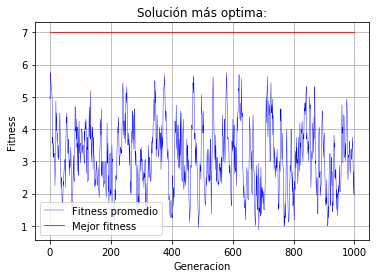

In [36]:
plt.plot(ejex0, ejey1, '-', linewidth=0.4, color='b', label='Fitness promedio')
plt.plot(ejex0, ejey0, '-', linewidth=0.8, color='r', label='Mejor fitness')
plt.xlabel('Generacion')
plt.ylabel('Fitness')
plt.legend()
plt.title('Solución más optima:')
plt.grid()
plt.show()